# DOC
### Nama Anggota kelompok :
- Erick Apriansyah(2009106110) (Ketua)
- Ahmad Riadi(2009106115) (Anggota)

Job Desk :
Erick > Pre-processing dan Evaluasi
Riadi > Visualization dan Modelling

### Penjelasan Dataset :
Dataset merupakan gambar yang mana di bagi menjadi 2 label vehicles dan non-vehicle, dalam dataset kita mengklasifikasikan bagian image yang vehicle dan non vehicle
untuk jumlah total dataset sendiri 17760


# Import Library

Pre-processing : 

In [43]:
import os, shutil
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator

Visualization :  

In [44]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import tqdm
import cv2
from tensorflow.keras.preprocessing import image

Modelling dan Evaluasi :

In [45]:
import tensorflow as tf
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [46]:
import warnings
warnings.filterwarnings('ignore')

# Pre-processing

disini langkah pertama kita lakukan adalah memprocessing data yang telah kita dapatkan agar dapat diolah komputer
1. Membuat variabel yang menampung path data awal

In [47]:
vehicle_dir = r"C:\Users\Asus\Downloads\Compressed\data\vehicles"
non_vehicle_dir = r"C:\Users\Asus\Downloads\Compressed\data\non-vehicles"

In [48]:
vehicle_dir_name = os.listdir(vehicle_dir)
non_vehicle_dir_name = os.listdir(non_vehicle_dir)
print('Total Vehicle Image       :', len(vehicle_dir_name))
print('TOTAL Non - Vehicle Image :', len(non_vehicle_dir_name))

Total Vehicle Image       : 8792
TOTAL Non - Vehicle Image : 8968


2. Membuat folder awal dalam folder main/utama

In [49]:
if not os.path.exists('./output'):
        os.makedirs('./output')

In [50]:
dir = './output/'
train_dir = os.path.join(dir, 'train')
val_dir =os.path.join(dir, 'validation')
test_dir = os.path.join(dir, 'test')
vehicle_train_dir = os.path.join(train_dir, 'vehicles')
non_vehicle_train_dir = os.path.join(train_dir, 'non-vehicles')
vehicle_val_dir = os.path.join(val_dir, 'vehicles')
non_vehicle_val_dir = os.path.join(val_dir, 'non-vehicles')
vehicle_test_dir = os.path.join(test_dir, 'vehicles')
non_vehicle_test_dir = os.path.join(test_dir, 'non-vehicles')

In [51]:
train = []
label1 = []
label2 = []
label=[]
for i in tqdm.tqdm(vehicle_dir_name):
    img = cv2.imread(vehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    label1.append("Vehicle")
    label.append("Vehicle")
    
for i in tqdm.tqdm(non_vehicle_dir_name):
    img = cv2.imread(non_vehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    label2.append("Non Vehicle")
    label.append("Non Vehicle")

le = LabelEncoder()
label1= le.fit_transform(label1)
label1 = to_categorical(label1)
label2= le.fit_transform(label2)
label2= to_categorical(label2)
print('\nLabel Vehicle : ',label1.shape)
print('\nLabel Non-Vehicle : ',label2.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 8968/8968 [01:41<00:00, 88.79it/s]



Label Vehicle :  (8792, 1)

Label Non-Vehicle :  (8968, 1)


3. Menentukan Size Masing Masing train,validation,dan split 

  Train > 0.7
  
  Validation > 0.21
  
  Test > 0.09

In [52]:
train_size =0.7
test_size = 0.3

4. Memulai Split Data

In [53]:
train_vehicles,xtrain_rem, val_label_x, test_label_x = train_test_split(
                        vehicle_dir_name, label1,train_size=train_size, shuffle=True, random_state=1
                    )
valid_vehicles, test_vehicles, = train_test_split(
                        xtrain_rem, test_size=test_size, shuffle=True, random_state=1
                    )
train_non_vehicles,ytrain_rem, val_label_y, test_label_y =train_test_split(
                        non_vehicle_dir_name,label2, train_size=train_size, shuffle=True, random_state=1
                    )
valid_non_vehicles,test_non_vehicles = train_test_split(
                        ytrain_rem, test_size=test_size, shuffle=True, random_state=1
                    )

print('Total Train of Vehicle Image :', len(train_vehicles))
print('Total Train of Non-Vehicle Image :', len(train_vehicles))
print('Total Validation of Vehicle Image:', len(valid_vehicles))
print('Total Validation of Non-Vehicle Image:', len(valid_vehicles))
print('Total Test of Vehicle Image :', len(test_vehicles))
print('Total Test of Non-Vehicle Image :', len(test_vehicles))

Total Train of Vehicle Image : 6154
Total Train of Non-Vehicle Image : 6154
Total Validation of Vehicle Image: 1846
Total Validation of Non-Vehicle Image: 1846
Total Test of Vehicle Image : 792
Total Test of Non-Vehicle Image : 792


5. Bikin Function untuk copy image dan memindahkannya ke folder baruu


In [54]:
def move_images(image_list, old_dir_path, new_dir_path):
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
    
    for file_name in image_list:
        shutil.copy(
            os.path.join(old_dir_path, file_name),
            os.path.join(new_dir_path, file_name)
        )
    print(f'{len(image_list)} IMAGES COPIED TO {new_dir_path}')

In [55]:
move_images(train_vehicles, vehicle_dir, vehicle_train_dir)
move_images(train_non_vehicles, non_vehicle_dir, non_vehicle_train_dir)
move_images(valid_vehicles, vehicle_dir, vehicle_val_dir)
move_images(valid_non_vehicles, non_vehicle_dir, non_vehicle_val_dir)
move_images(test_vehicles, vehicle_dir, vehicle_test_dir)
move_images(test_non_vehicles, non_vehicle_dir, non_vehicle_test_dir)

6154 IMAGES COPIED TO ./output/train\vehicles
6277 IMAGES COPIED TO ./output/train\non-vehicles
1846 IMAGES COPIED TO ./output/validation\vehicles
1883 IMAGES COPIED TO ./output/validation\non-vehicles
792 IMAGES COPIED TO ./output/test\vehicles
808 IMAGES COPIED TO ./output/test\non-vehicles


6. Augmentasi data yang telah di splitting

In [56]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [57]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 300),
    batch_size=4,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 300),
    batch_size=2,
    shuffle=True,
    class_mode='categorical'
)
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(150, 300),
    batch_size=2,
    shuffle=True,
    class_mode='categorical'
)

Found 12431 images belonging to 2 classes.
Found 3729 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


# Visualization

Melihat Metadata dari image yang kita buat :

In [58]:
x_train,y_train = train_generator.next()
print(x_train.shape,y_train.shape)

(4, 150, 300, 3) (4, 2)


In [59]:
train_generator.class_indices

{'non-vehicles': 0, 'vehicles': 1}

In [60]:
file_extension = pathlib.Path('./output/train/vehicles/1.png').suffix
print("File Extension: ", file_extension)

File Extension:  .png


In [61]:
print("Total Image Vehicle : ", len(vehicle_dir_name))
print("Total Image Non-Vehicle : ", len(non_vehicle_dir_name))

Total Image Vehicle :  8792
Total Image Non-Vehicle :  8968


visualisasi data yang telah didapat 

In [62]:
train = np.array(train)
label = np.array(label)
train.shape,label.shape

((17760, 150, 150, 3), (17760,))

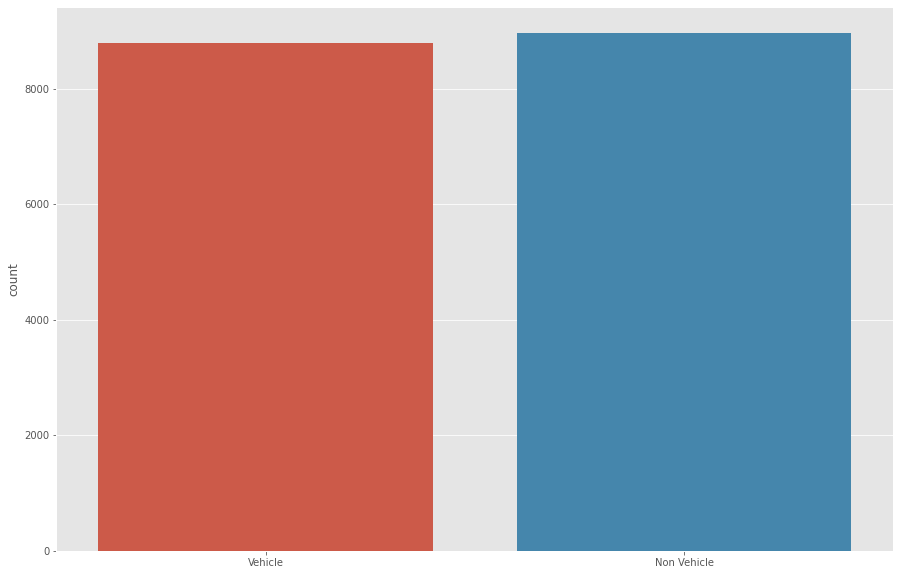

In [63]:
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
sns.countplot(x=label)
plt.show()

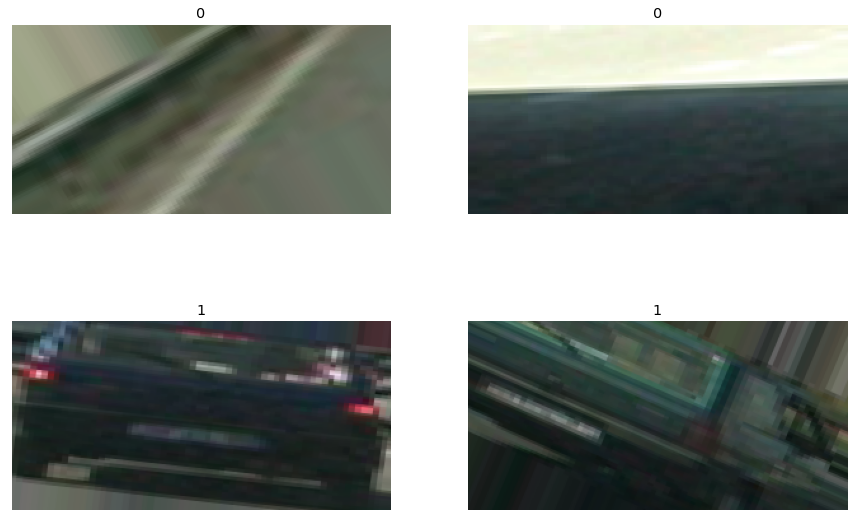

In [64]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))

# Modelling

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[150, 300, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 298, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 99, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 77616)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2483744   
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,484,258
Trainable params: 2,484,258
Non-trainable params: 0
____________________________________________

In [67]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Evaluasi

In [68]:
hasil = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3108/3108 [==============================] - 785s 250ms/step - loss: 0.6650 - accuracy: 0.5525 - val_loss: 0.4414 - val_accuracy: 0.8565
Epoch 2/10
3108/3108 [==============================] - 378s 122ms/step - loss: 0.3779 - accuracy: 0.8517 - val_loss: 0.2673 - val_accuracy: 0.9094
Epoch 3/10
3108/3108 [==============================] - 343s 110ms/step - loss: 0.2652 - accuracy: 0.9120 - val_loss: 0.1738 - val_accuracy: 0.9541
Epoch 4/10
3108/3108 [==============================] - 394s 127ms/step - loss: 0.1735 - accuracy: 0.9463 - val_loss: 0.1057 - val_accuracy: 0.9689
Epoch 5/10
3108/3108 [==============================] - 401s 129ms/step - loss: 0.1447 - accuracy: 0.9561 - val_loss: 0.1011 - val_accuracy: 0.9654
Epoch 6/10
3108/3108 [==============================] - 411s 132ms/step - loss: 0.1186 - accuracy: 0.9609 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 7/10
3108/3108 [==============================] - 493s 159ms/step - loss: 0.1211 - accuracy: 0.9600 - val_

In [69]:
accuracy_train = hasil.history['accuracy']
val_accuracy_train = hasil.history['val_accuracy']
loss_train =  hasil.history['loss']
val_loss = hasil.history['val_loss']
x = range(len(accuracy_train))

Loss untuk modellingnya 

Text(0.5, 1.0, 'loss')

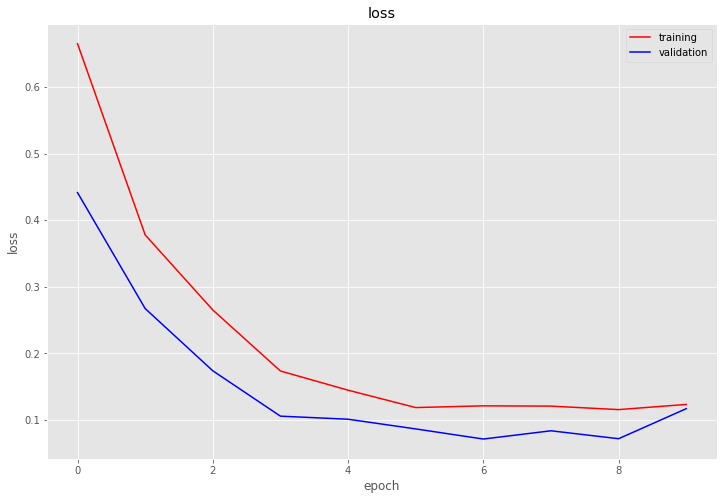

In [70]:
plt.figure(2, figsize=(12,8))
plt.plot(x, loss_train, c='r', label='training')
plt.plot(x, val_loss, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')

Accuracy untuk modellingnya 

Text(0.5, 1.0, 'accuracy')

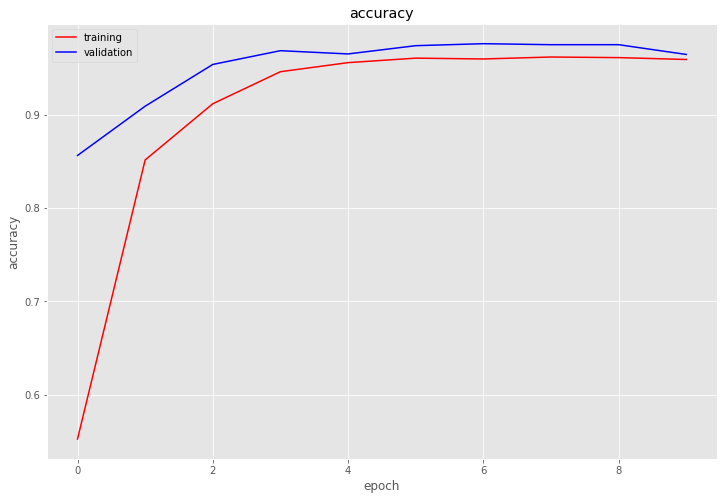

In [71]:
plt.figure(1, figsize=(12,8))
plt.plot(x, accuracy_train, c='r', label='training')
plt.plot(x, val_accuracy_train, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')

Predictions and evaluate

In [72]:
evaluasi = model.evaluate(test_generator)

800/800 [==============================] - 35s 44ms/step - loss: 0.1403 - accuracy: 0.9631


In [73]:
print("Hasil Evaluasi : ", evaluasi)

Hasil Evaluasi :  [0.1403447687625885, 0.9631249904632568]


In [74]:
predict = model.predict(test_generator)

800/800 [==============================] - 7s 9ms/step


In [75]:
predict = np.argmax(predict,axis=1)
predict.shape

(1600,)

In [76]:
predict2 = le.fit_transform(predict)
predict2 = to_categorical(predict2)


In [77]:
predict2.shape

(1600, 2)

In [78]:
label = np.array(label[8100:-8060])

In [79]:
label = le.fit_transform(label)
label = to_categorical(label)

In [80]:
label.shape

(1600, 2)

Classification Report

In [81]:
print(classification_report( label, predict2, target_names = ['Vehicle (Class 0)','Non vehicle (Class 1)']))

                       precision    recall  f1-score   support

    Vehicle (Class 0)       0.58      0.55      0.56       908
Non vehicle (Class 1)       0.44      0.47      0.46       692

            micro avg       0.52      0.52      0.52      1600
            macro avg       0.51      0.51      0.51      1600
         weighted avg       0.52      0.52      0.52      1600
          samples avg       0.52      0.52      0.52      1600



((<Figure size 576x504 with 1 Axes>,
  <AxesSubplot:xlabel='predicted label', ylabel='true label'>),)

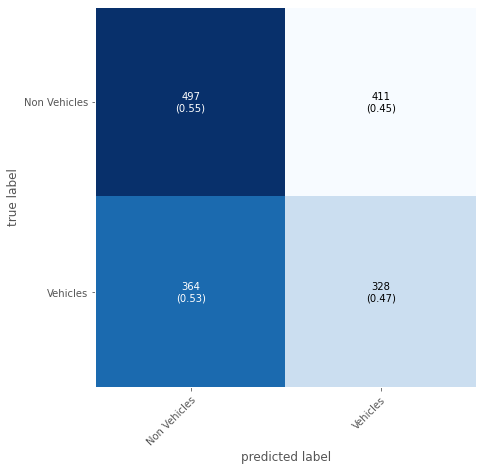

In [82]:
cm = confusion_matrix(label.argmax(axis=1),predict2.argmax(axis=1))
plot_confusion_matrix(
    conf_mat = cm,
    figsize=(8,7),
    class_names =['Non Vehicles', 'Vehicles'],
    show_normed = True),

Saving Model

In [83]:
if not os.path.exists('./model'):
        os.makedirs('./model')

In [84]:
model.save('./model/model_finished.h5')